In [1]:
import pandas as pd
import numpy as np
from IPython.display import display


df1 = pd.read_csv('data.csv', parse_dates=['timestamp'])
df2 = pd.read_csv('k_range_data.csv', parse_dates=['timestamp'])

df = pd.concat([df1, df2])

df = df[df['timestamp'] > '2021-07-21']
print(df)

                   func  control       ta       agg  meter_num  meter_time  \
0        meterRegTime_3    10700  1457800         0         60   838101900   
1        meterRepTime_3  9750200        0  14110800         60   378310300   
2        meterRegTime_3     9900   385600         0         50   692593200   
3        meterRegTime_3     9800   357800         0         50   690603000   
4        meterRepTime_3  9338800        0   3785700         50   306429800   
...                 ...      ...      ...       ...        ...         ...   
131929  meterRepTime_r6  9086500        0   1332000         20   122044600   
131930  meterRepTime_r5  9388500        0   1358700         20   122107500   
131931  meterRepTime_r4  9252300        0   1355900         20   124220600   
131932  meterRepTime_r3  9083300        0   1294700         20   121458100   
131933  meterRepTime_r2  9309800        0   1361800         20   124707400   

       name       host           timestamp  
0       cir  Bruce

In [2]:

df['ex_meter_time'] = df.control + df.ta + df['agg']

# display(df.style)
df.head()
# print( + df.control)

,func,control,ta,agg,meter_num,meter_time,name,host,timestamp,ex_meter_time
0,meterRegTime_3,10700,1457800,0,60,838101900,cir,BruceChen,2021-07-23 08:31:11,1468500
1,meterRepTime_3,9750200,0,14110800,60,378310300,cir,BruceChen,2021-07-23 08:31:11,23861000
2,meterRegTime_3,9900,385600,0,50,692593200,cir,BruceChen,2021-07-23 08:31:11,395500
3,meterRegTime_3,9800,357800,0,50,690603000,cir,BruceChen,2021-07-23 08:31:11,367600
4,meterRepTime_3,9338800,0,3785700,50,306429800,cir,BruceChen,2021-07-23 08:31:11,13124500


In [3]:
avg_col = {'control':np.mean, 'ta':np.mean, 'agg':np.mean, 'meter_time':np.mean, 'ex_meter_time':np.mean}
avg_df_midx = df.groupby(['host', 'name', 'func', 'meter_num']).agg(avg_col)
display(avg_df_midx.style)
avg_df_midx.rename(index={'cir':'our'})

control   ta  \
host        name   func                meter_num                      
BruceChen   boudia oneTimeMeterRegTime 20         1.230801e+03  0.0   
                                       30         1.178085e+03  0.0   
                                       40         9.573983e+02  0.0   
                                       50         9.701552e+02  0.0   
                                       60         2.064030e+05  0.0   
...                                                        ...  ...   
raspberrypi ni     oneTimeMeterRepTime 20         6.577190e+07  0.0   
                                       30         6.555265e+07  0.0   
                                       40         6.527130e+07  0.0   
                                       50         6.510649e+07  0.0   
                                       60         6.568253e+07  0.0   

                                                           agg    meter_time  \
host        name   func                meter_num                               
BruceChen   boudia oneTimeMeterRegTime 20         1.299724e+08  1.298585e+08   
                                       30         1.952414e+08  1.951927e+08   
                                       40         2.600127e+08  2.599872e+08   
                                       50         3.266432e+08  3.264734e+08   
                                       60         3.929661e+08  3.925987e+08   
...                                                        ...           ...   
raspberrypi ni     oneTimeMeterRepTime 20         3.933533e+09  2.210176e+09   
                                       30         5.885179e+09  3.318676e+09   
                                       40         7.832120e+09  4.428761e+09   
                                       50         9.786938e+09  5.553004e+09   
                                       60         1.177876e+10  6.709774e+09   

                                                  ex_meter_time  
host        name   func                meter_num                 
BruceChen   boudia oneTimeMeterRegTime 20          1.299737e+08  
                                       30          1.952426e+08  
                                       40          2.600137e+08  
                                       50          3.266442e+08  
                                       60          3.931725e+08  
...                                                         ...  
raspberrypi ni     oneTimeMeterRepTime 20          3.999305e+09  
                                       30          5.950731e+09  
                                       40          7.897391e+09  
                                       50          9.852044e+09  
                                       60          1.184445e+10  

[171 rows x 5 columns]

In [4]:
display(avg_df_midx.index)

MultiIndex([(  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 20),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 30),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 40),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 50),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 60),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 20),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 30),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 40),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 50),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 60),
            ...
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 20),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 30),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 40),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 50),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime',

# 本文方法分析


In [5]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10
# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 2.5
plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["axes.formatter.use_mathtext"] = True
markers = ['o', 'v', 's', 'd', 'X']
color = ['b', 'y', 'g', 'r']

In [6]:
df_krange = pd.read_csv('k_range_data.csv', parse_dates=['timestamp'])

df_krange['ex_meter_time'] = df_krange.control + df_krange.ta + df_krange['agg']
df_krange.head()
avg_col = {'control':np.mean, 'ta':np.mean, 'agg':np.mean, 'meter_time':np.mean, 'ex_meter_time':np.mean}
avg_df_midx = df_krange.groupby(['host', 'name', 'func', 'meter_num']).agg(avg_col)
display(avg_df_midx.style)
avg_df_midx.rename(index={'cir':'our'})
kMax = 21
kMin = 3

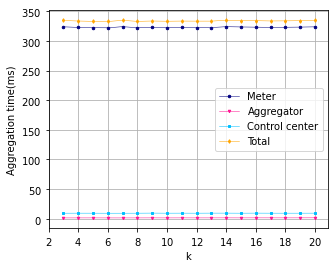

In [7]:
#聚合阶段
# k anonymous report merter
k = [k for k in range(kMin,kMax)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(kMin, kMax)]
m_num = 20
k_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[0],color='navy', label='Meter')

# k anonymous report aggregator
k = [k for k in range(kMin,kMax)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(kMin, kMax)]
m_num = 20
k_y = [avg_df_midx.loc[('BruceChen', 'cir', f, m_num), 'agg']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[1], color='deeppink', label='Aggregator')

# k anonymous report controll

k = [k for k in range(kMin,kMax)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(kMin, kMax)]
m_num = 20
k_y = [avg_df_midx.loc[('BruceChen', 'cir', f, m_num), 'control']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[2], color='deepskyblue', label='Control center')


# k anonymous report total

k = [k for k in range(kMin,kMax)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(kMin, kMax)]
m_num = 20
k_y = []
for f in k_anony_f:
    rasp_time = avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']
    host_time = avg_df_midx.loc[('BruceChen', 'cir', f, m_num), 'ex_meter_time']
    y_time = (rasp_time + host_time) / 1e6
    k_y.append(y_time)

plt.plot(k, k_y, marker=markers[3], color='orange', label='Total')
plt.ylabel('Aggregation time(ms)')
plt.xlabel('k')
plt.xticks(range(2,21,2))
plt.grid()
plt.legend()
plt.savefig('figs/aggregation_k.svg')
plt.show()

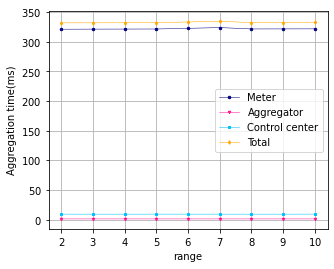

In [8]:
# 合并显示
# k anonymous range meter
rMax = 11
r = [r for r in range(2,rMax)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2,rMax)]
m_num = 20
r_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in r_anony_f]

plt.plot(r, r_y, marker=markers[0],  color='navy', label='Meter')


# k anonymous range aggregator

r = [r for r in range(2,rMax)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2, rMax)]
m_num = 20
r_y = [avg_df_midx.loc[('BruceChen', 'cir', f, m_num), 'agg']/1e6 for f in r_anony_f]

plt.plot(r, r_y, marker=markers[1],  color='deeppink', label='Aggregator')



# k anonymous range control

r = [r for r in range(2,rMax)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2,rMax)]
m_num = 20
r_y = [avg_df_midx.loc[('BruceChen', 'cir', f, m_num), 'control']/1e6 for f in r_anony_f]

plt.plot(r, r_y, marker=markers[2],  color='deepskyblue', label='Control center')



# k anonymous range total

r = [r for r in range(2,rMax)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2,rMax)]
m_num = 20
r_y = []
for fname in r_anony_f:
    rasp_time = avg_df_midx.loc[('raspberrypi', 'cir', fname, m_num), 'meter_time']
    host_time = avg_df_midx.loc[('BruceChen', 'cir', fname, m_num), 'ex_meter_time']
    y_time = (rasp_time + host_time) / 1e6
    r_y.append(y_time)

plt.plot(r, r_y, marker=markers[3], color='orange', label='Total')
plt.ylabel('Aggregation time(ms)')
plt.xlabel('Range')
plt.legend()
plt.grid()
plt.savefig('figs/aggregation_range.svg')
plt.show()